#### WINE QUALITY  PREDICTION IN CLASSIFICATION

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### understand the data

In [104]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [105]:
df.shape

(1599, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### count of quality feature

In [107]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

#### data visualization

<Axes: xlabel='quality', ylabel='count'>

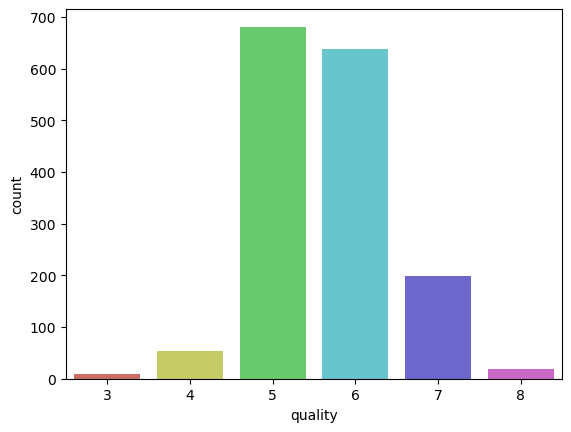

In [108]:
sns.countplot(x=df['quality'],palette='hls')

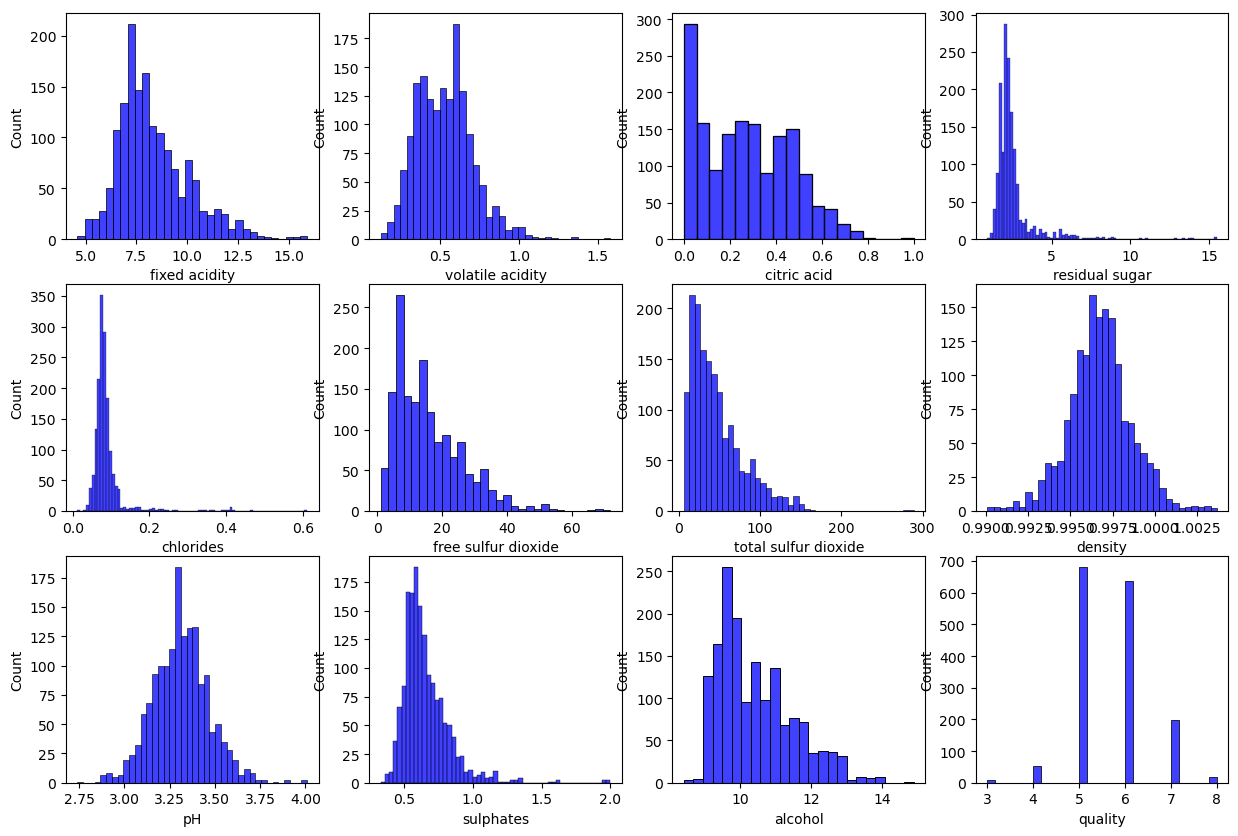

In [109]:
Num_fea=df.select_dtypes(exclude='object')
#distribution of plot each as subplot
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k=0
for i in range(3):#rows
    for j in range(4):#columns
        sns.histplot(df[df.columns[k]],ax=axes[i][j],color='blue')
        k+=1
plt.show()


In [110]:
#apply log transform on features 
df["residual sugar"]=np.log(df["residual sugar"])
df["chlorides"]=np.log(df["chlorides"])
df["free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["sulphates"]=np.log(df["sulphates"])

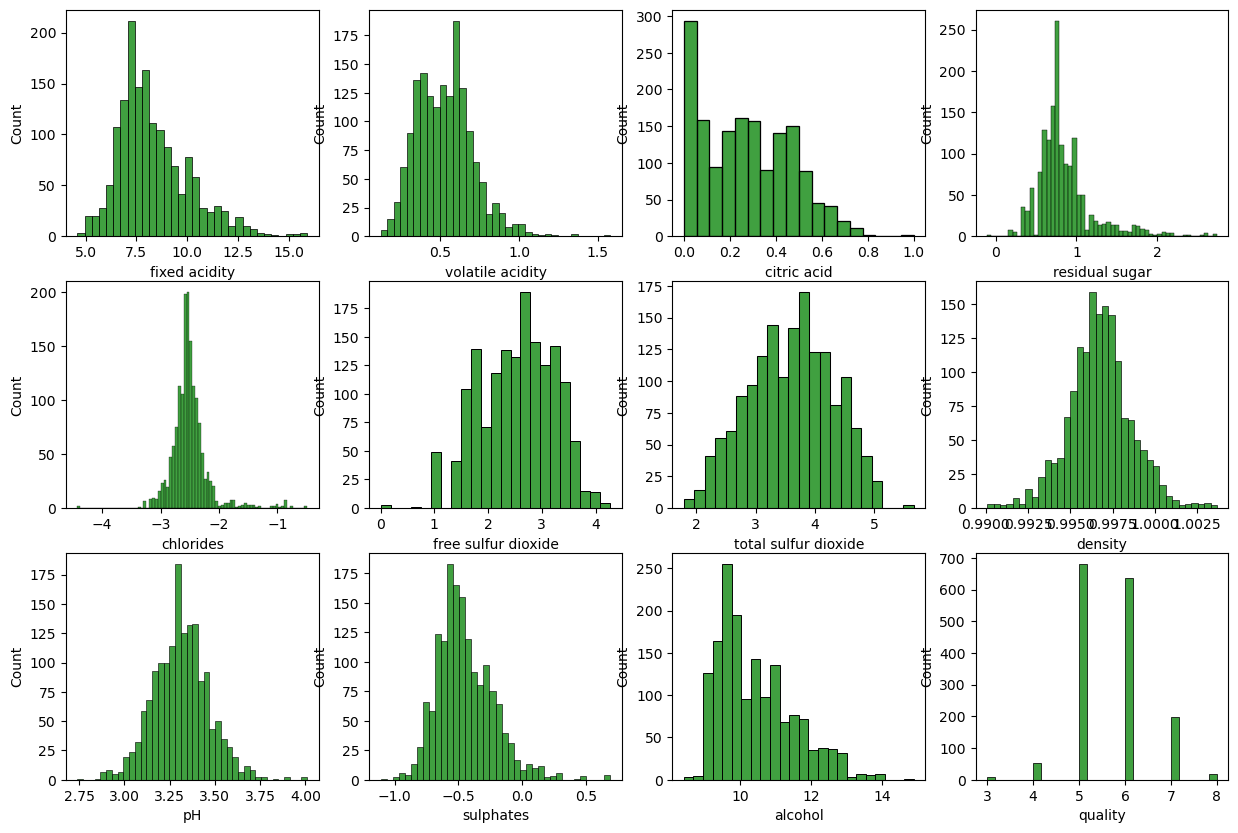

In [111]:
Num_fea=df.select_dtypes(exclude='object')
#distribution of plot each as subplot
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k=0
for i in range(3):#rows
    for j in range(4):#columns
        sns.histplot(df[df.columns[k]],ax=axes[i][j],color='green')
        k+=1
plt.show()

In [112]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [113]:
df.duplicated().sum()

np.int64(240)

In [114]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

#### feature selection

In [115]:
#independent feature
X=df.drop('quality',axis='columns')
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8
5,7.4,0.66,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4


In [116]:
y=df['quality']
y.head()


0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [117]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

#### imbalanced data we need convert into balanced data so to convert we use imblearn to install we pip install imblearn by using upsampling

In [118]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE(k_neighbors=4)
# transform the dataset
X,y =oversample.fit_resample(X.fillna(0),y)

In [119]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [120]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,2.547871,3.604522,0.996709,3.309787,-0.444642,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,0.683899,0.711538,0.001869,0.155036,0.224199,1.082065,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996700,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,3.044522,4.143135,0.997820,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,14.900000,8.000000


#### feature scaling


In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.head()


,0,1,2,3,4,5,6,7,8,9,10
0,-0.505531,0.440422,-1.269727,-0.647249,-0.215434,0.049862,0.268201,0.721344,1.132806,-0.614712,-1.121071
1,-0.267794,1.143332,-1.269727,0.257482,0.563883,1.274596,1.234718,0.196285,-0.880241,0.253981,-0.792456
2,-0.267794,0.674726,-1.074340,-0.096159,0.370218,0.512549,0.927367,0.301297,-0.490619,0.052103,-0.792456
3,1.752970,-1.199701,1.465694,-0.647249,-0.256035,0.699267,1.077489,0.826356,-1.139990,-0.457706,-0.792456
4,-0.505531,0.284220,-1.269727,-0.803204,-0.256035,0.299072,0.499765,0.721344,1.132806,-0.614712,-1.121071


In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#  Apply LogRegression

In [123]:
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train,y_train)
LogReg_acc=round(model_LogReg.score(X_test, y_test)*100)
LogReg_acc

60

In [124]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

85

In [125]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

88

In [126]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

92

In [127]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

81

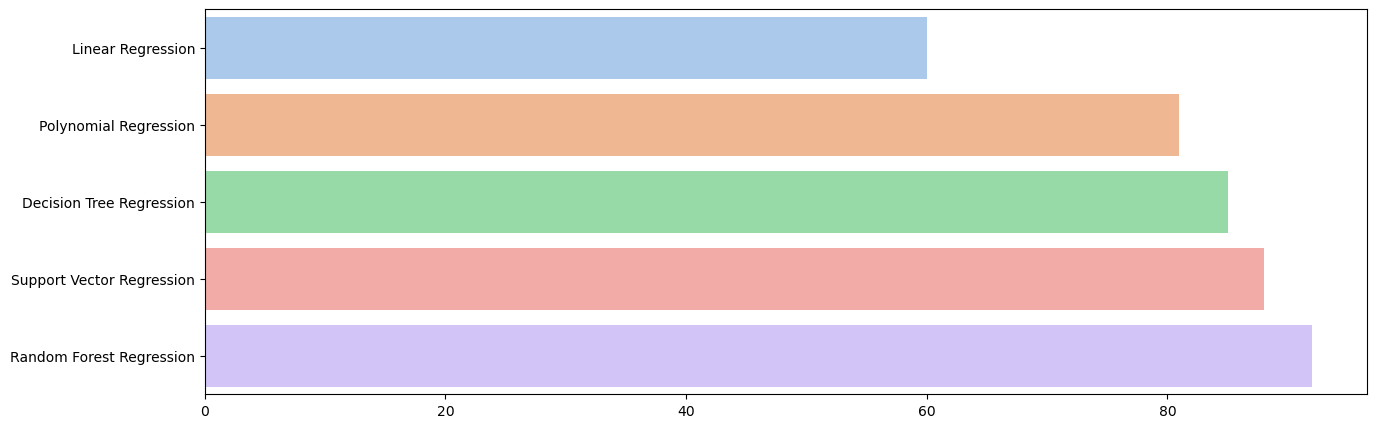

In [128]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LogReg_acc, PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel')
plt.show()

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


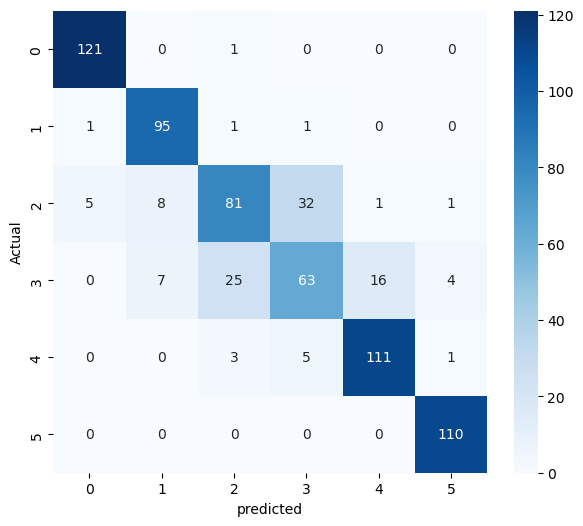

array([[121,   0,   1,   0,   0,   0],
       [  1,  95,   1,   1,   0,   0],
       [  5,   8,  81,  32,   1,   1],
       [  0,   7,  25,  63,  16,   4],
       [  0,   0,   3,   5, 111,   1],
       [  0,   0,   0,   0,   0, 110]])

In [130]:
from sklearn.metrics import confusion_matrix
try:
    if not('cm' in globals() and hasattr(cm, "ndim") and cm.ndim ==2):
        raise NameError
except NameError:
    cm = confusion_matrix(y_test,rf_model.predict(X_test))
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
cm

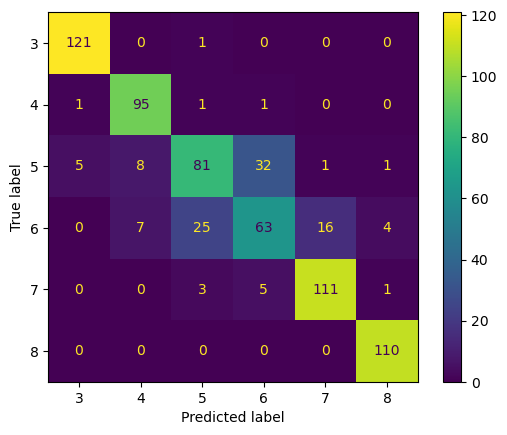

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_model.classes_)
cm_display.plot()
plt.show()

In [136]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':34.4,
    'volatile acidity':78.70,
    'citric acid':2.00,
    'residual sugar':5.6,
    'chlorides':1.9,
    'free sulfur dioxide':1.96,
    'total sulfur dioxide':89,
    'density':3,
    'pH':5,
    'sulphates':45.8,
    'alcohol':56.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = rf_model.predict(user_input)

print("predicted value", prediction)

predicted value [7]


In [133]:
import pickle
filename = 'scaler_model.sav'
pickle.dump(scaler,open(filename,'wb'))


In [134]:
import pickle
filename = 'finalized_RFmodel.sav'
pickle.dump(rf_model,open(filename,'wb'))